<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_1__3_2_%D1%87%D0%B0%D1%81%D1%82%D1%8C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение в нейросети - продолжение

Сегодня мы разберёмся с фреймворком для нейросетей TensorFlow и посмотрим на детали того, что происходит «под капотом».

### Линейная классификация

Представьте, что у нас есть признаки x = (x1, x2) и выборка положительных и отрицательных точек y ∈ {+1, −1}.

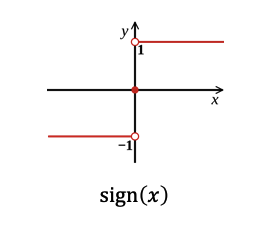

Нам нужно найти разделяющую гиперплоскость между ними. В данном случае это просто линия, которая задаётся тремя коэффициентами (w0, w1, w2):

image.png

Нам нужно найти три коэффициента w, которые зададут линию. Далее мы можем взять точку х и понять, где она находится относительно линии — выше или ниже. Для этого мы должны узнать знак линейной комбинации. Вектор весов w задаёт нормаль к нашей линии, то есть он перпендикулярен ей (фиолетовый вектор на графике ниже).

**Линейная комбинация** — это скалярное произведение и длина проекции какого-нибудь другого вектора на наш вектор w.

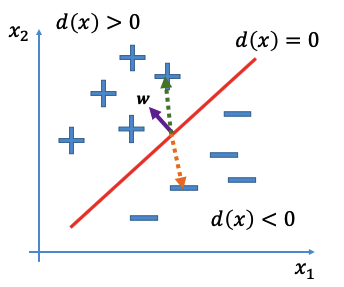

Видно, почему проекция становится разных знаков: если точки по одну сторону линии, то они положительны, иначе - отрицательны. Из этих соображений мы делаем линейный классификатор. Наш алгоритм:

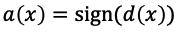

sign(d(x)) - знак нашей линейной комбинации. Настроить линейный классификатор — значит найти эти коэффициенты.

#### Логистическая регрессия

Она тоже решает задачу классификации, но в конце применяется не функция знака, а **сигмоидная функция**. Она превращает длину проекции в уверенность.

Уверенность и неуверенность появляется из-за краевых эффектов: на границе классов может быть какой-то шум, и в классификации точек, которые находятся рядом с красной разделяющей линией, мы не очень уверены.



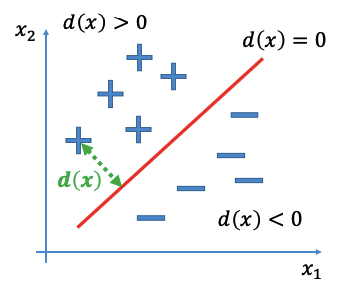

Если мы уходим далеко от линии вглубь классов, то предполагается, что мы более уверены в этом предсказании. Сигмоида делает именно это — превращает длину проекции линейной комбинации в уверенность.

Сигмоида устроена неслучайным образом:

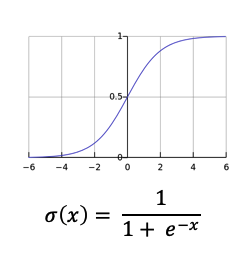

Если длина проекции 0 (точка ровно на красной линии), то сигмоида даёт 0.5, то есть модель уверена в положительности или отрицательности 50/50.

Логистическая регрессия предсказывает вероятность положительного класса. Вероятность отрицательного будет равна единица минус предсказанная вероятность положительного класса.

**Другой пример**

Представим, что у нас есть следующая задача:

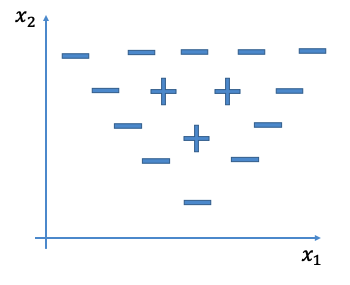

Здесь выборка чуть сложнее, линией она не разделяется. Нужно придумать какой-то другой алгоритм.

Чтобы решить подобную задачу, мы можем «подпереть» треугольник тремя линиями и создать алгоритм, используя только логистическую регрессию.

Для начала отделим минусы слева и построим логистическую регрессию:

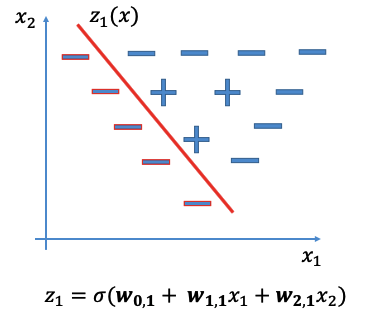

Эти данные подадим для обучения логистической регрессии и получим коэффициенты красной линии.

Отделим остальные минусы:

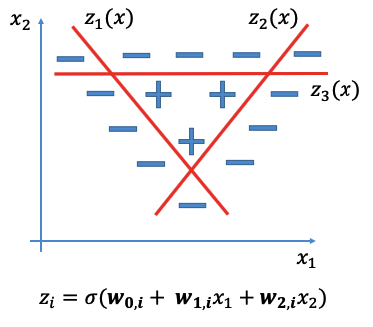

Все коэффициенты мы получили практически вручную. Сейчас у нас есть коэффициенты трёх логистических регрессий, каждая из которых решает свою маленькую подзадачу.

Теперь возьмём какую-нибудь точку и посмотрим, какие три предсказания дают эти линии в точке:



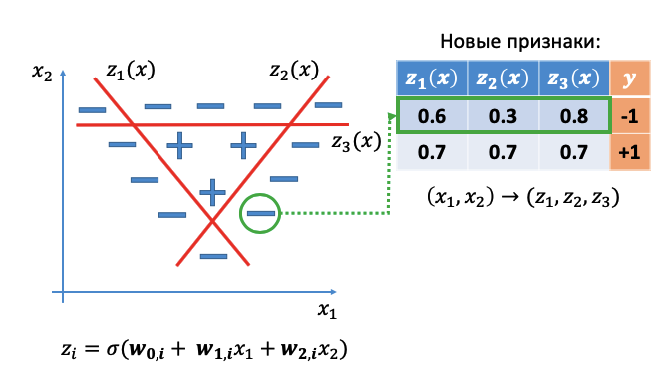

Для этой точки z1дает предсказание 0.6, так как от z1 мы двигаемся в положительную сторону и недалеко от линии, поэтому получаем число, близкое к 0.5.

#### Что делать с этими тремя значениями?

В координатах х1 и х2 эта задача не решается, поэтому полученные коэффициенты мы можем рассматривать как новые координаты.

Получим три признака, каждый из которых говорит, где мы находимся относительно каждой стороны треугольника.

Давайте возьмём наш целевой признак **y**, добавим его в новую таблицу, где находятся новые признаки с предсказаниями, и попробуем решить задачу с новыми признаками с помощью линейной логистической регрессии. На новой выборке получим логистическую регрессию:



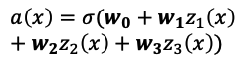

Теперь она даёт нам некоторые коэффициенты и взвешивает уже не признаки, а предсказания. То, что мы получили — простейшая нейросеть.

### Граф вычислений
На данный момент мы «вручную» нашли параметры всех линий:

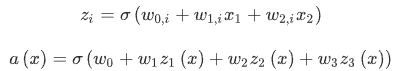

При этом на нашу сложную комбинацию функций можно посмотреть как на граф вычислений. У графа есть **вершины**, и каждая вершина — вычисляемое значение.

Также есть **рёбра** — зависимости, которые имеют направления (на картинке ниже это стрелочки). Ребро идёт от **х1** к **z1** в случае, если нам необходим **х1**, чтобы вычислить значение **z1**. Это граф зависимости между вычисляемыми значениями:

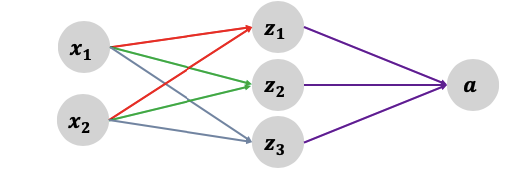

Граф соответствует комбинации наших функций. Такой граф называют многослойным персептроном (MLP), и здесь уже можно видеть некоторые слои:

* входной слой (признаки);

* скрытый слой (нейроны) - это все промежуточные линии, которые мы строили для перехода в новые координаты. На скрытом слое расположены нейроны (линейная комбинация входов + нелинейная функция, например, сигмоида);

* выходной слой (предсказания). Если задача регрессии, то это может быть 1 нейрон на выходе, который предсказывает число. Если это задача классификации на k классов, то может быть k нейронов на выходном слое, каждый из которых предсказывает вероятность соответсвующего класса.

### Нелинейности в нейронах

Возьмём в качестве примера следующий граф:

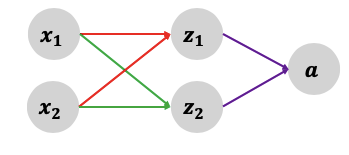

Если нелинейности убрать, то на этом примере видно, что наша модель станет очень простой: мы можем подставить выражения для **z1** и **z2** в нашу модель **а**:

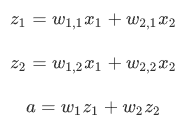

Мы можем раскрыть скобки, привести подобные слагаемые и всё, что мы получим — линейную комбинацию х1 и х2. При этом модель не становится сложнее.

image.png

### MLP

MLP — это простейший пример нейросети.

Многослойный перцептронможет иметь много скрытых слоев.  На картинке ниже видно 2 скрытых слоя - z и h.

Почему наслоение помогает решать более сложные задачи? Так как мы можем переходить в более новые координаты, которые устроены все более сложно, а задача в них решается все проще и проще, потому что финальная задача решается линейной моделью на выходном слое.


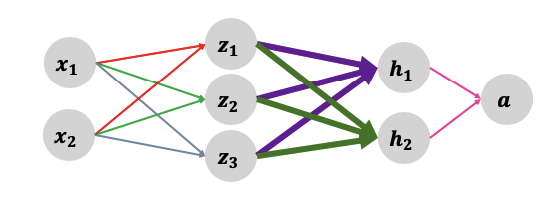

Каждый слой в MLP имеет свое название. Его называют плотным или полносвязным слоем:

* Dense layer (плотный);

* Fully-connected layer (полносвязный).

Заметим, что на картинке выше выделен жирным один слой, где видно, что входные и выходные нейроны связаны "каждый с каждым". Поэтому этот слой называется полносвязным.

Архитектура MLP (это все параметры, которые задаются руками):

* количество слоёв;
* количество нейронов в каждом слое;
* функция активации, которую будем использовать.

##### Вопросы:


1. Что такое Многослойный персептрон?
2. Почему наслоение помогает решать более сложные задачи?

##### Ответы:

1. Многослойный персептрон — это класс искусственных нейронных сетей прямого распространения, состоящих как минимум из трех слоев: входного, скрытого и выходного. За исключением входных, все нейроны использует нелинейную функцию активации.
2.  Так как мы можем переходить в более новые координаты, которые устроены все более сложно, а задача в них решается все проще и проще, потому что финальная задача решается линейной моделью на выходном слое.

### TensorFlow

Это инструмент для создания и обучения нейросетей.

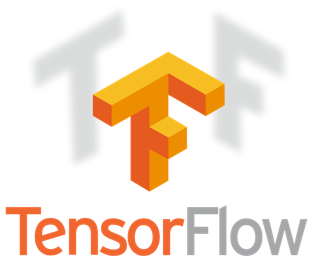

Основа вычислений в TF — граф. Каждая вершина графа — это одна операция, у которой есть входы и выходы.

На самом деле TF - двоякий инструмент. С одной стороны, он позволяет описывать эти графы вычислений. Эти вычисления происходят на Python.

С другой стороны, это подсистема, которая позволяет исполнять эти графы вычислений (на CPU, GPU, TPU,...). Когда этот граф исполняется, он исполняется эффективнее, чем на Python, так как используется язык С++, на котором эффективно написаны эти процедуры. Более того, это можно делать на одной или нескольнких машинах.


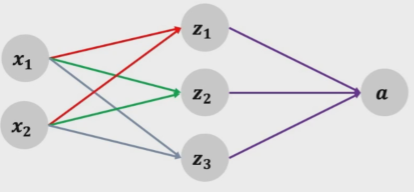


* Вход любой операции — это набор тензоров (многомерных массивов).

* Выход любой операции — это тоже набор тензоров.

Получается, что весь граф - это связанная структура из таких операций. Они на вход получают тензоры и выдают тоже тензоры.  Получаем целый граф операций, между которыми перекидываются тензоры.

Пример обучения - https://playground.tensorflow.org/


### Вспомним обучение нейронных сетей

Будем делать шаги по градиенту.

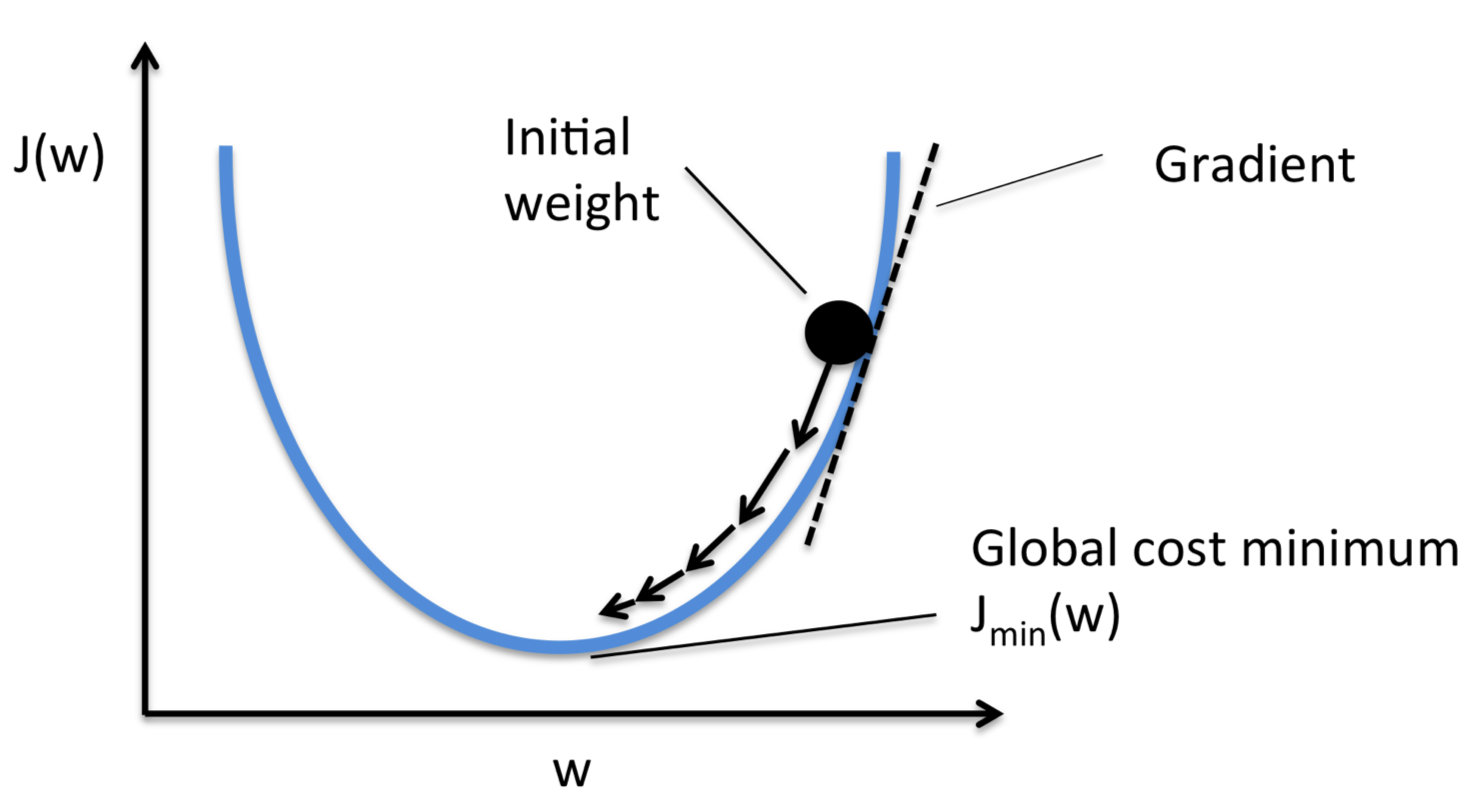

Функция потерь обычно гладкая и дифференцируемая (можно посчитать производную в любой точке). Если представить, что у нас есть параметр w, который нужно оптимизировать и есть некоторая дифференцируемая функция потерь, то мы можем начать с любой точки (initial weight) и посчитать в ней производную. В данном случае - это tg наклона касательной.

Мы на самом деле можем посчитать куда покатится мячик. Если его немного сдвинуть по направлению линии, мы сделаем нашу ошибку немного меньше. Если так продолжать делать в каждой новой точке, то мы скатимся в набор параметров, в котором наша ошибка минимальна. Так и работает градиентный спуск.

### Детали градиентного спуска: цепное правило

Умеем дифференцировать:

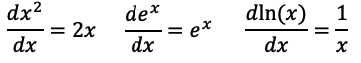

Возьмём сложную функцию, где **z1**, **z2** - функции от 2-х переменных x1 и x2, а **p** - функция от z1 и z2:

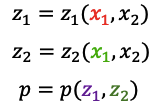

Цепное правило:

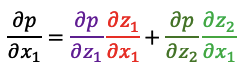

Пример для    
 image.png

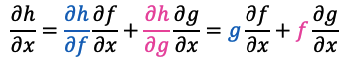

### Граф вычисления производных

Граф для вычисления нашей композиции:

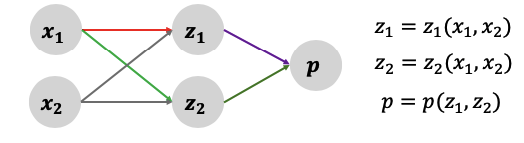

Построим из него граф из производных:

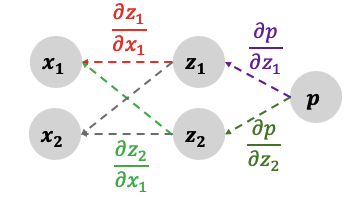

Каждому ребру приписана производная начала по концу. Можно догадаться, как работает цепное правило:

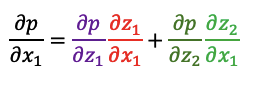

### Алгоритм вычисления производной в графе

Как посчитать производную a по b:

1. находим непосещённый путь из a в b;

2. перемножаем значения на рёбрах в пути;

3. добавляем в сумму;

4. возвращаемся к п.1.

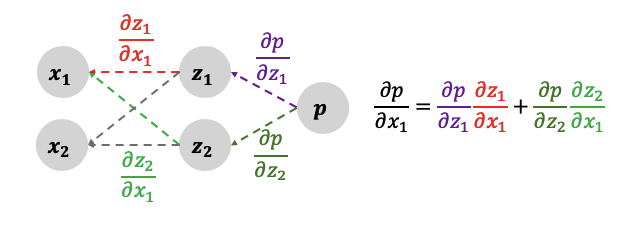

### Пример одного нейрона

Посмотрим на прямой и обратный граф на примере одного нейрона.

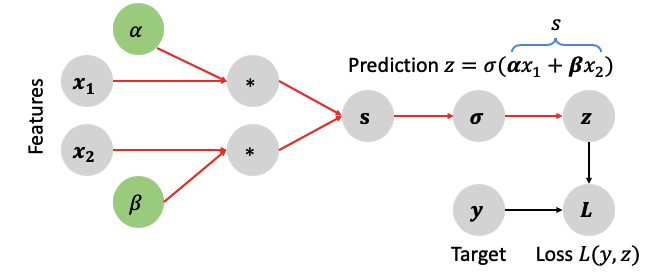

Рассмотрим, из чего он состоит по порядку:

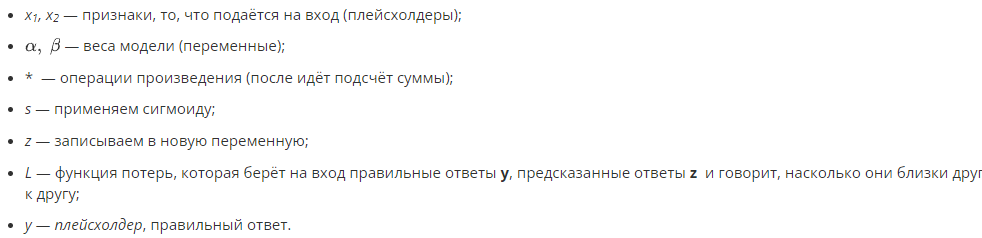

Производные функции потерь по всем нашим переменнным - по альфа и бетта, нам нужны, чтобы узнать, как нужно изменить альфу и бетту, чтобы минимизировать наши потери:

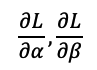

Для того чтобы взять производную, мы переворачиваем наш граф:

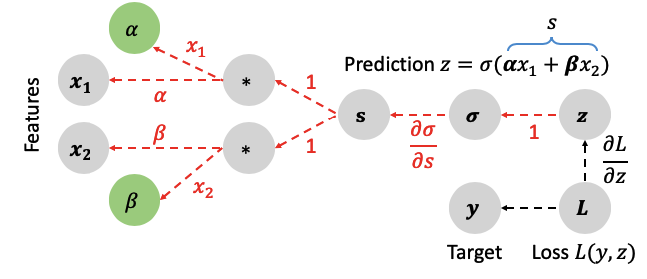

Для каждой стрелочки считаем производную. По сути нам нужно найти обратный путь от L до альфа:

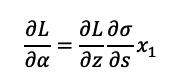

Так же считается и по бетта:

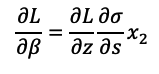

В TF  все производные строятся автоматически и достаточно быстро.

### Цепное правило и граф производных

Теперь у нас есть алгоритм для подсчёта производных для любых дифференцируемых графов вычислений.

Эффективный способ вычисления всех производных называется **backpropagation** (обратное распространение ошибки):

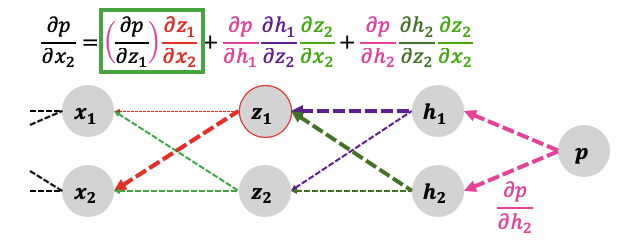

Например, нам нужны пути из р в х2. Мы видим, что часть этих путей неизбежно пройдет через z1, то есть можем переиспользовать производную р по z1.

Почему можем их переиспользовать? Потому что, чтобы перейти от z1 к х2, нужно сделать всего лишь еще один шаг, и это один множитель - производная z1по х2. То есть можно посчитать dp по dz1, dz1 по dx2.

Теперь нам не нужно эти длинные цепочки длиною 3 заново пересчитывать, так как мы можем переиспользовать вычисления, которые были немного правее. Поэтому это называется **обратным распространением ошибки**, так как вычислительно выгодно идти справа на лево в этом графе и считать эти производные. Когда мы переходим через один слой, мы очень быстро одним домножением получаем новые производные.

### **Backpropagation (Backprop)**

В backpropogation есть два прохода: прямой и обратный. Те производные, которые считает обратный граф, нужно считать в определённой точке. Именно для этого нужен прямой проход — он рассчитает аргументы всех этих производных:

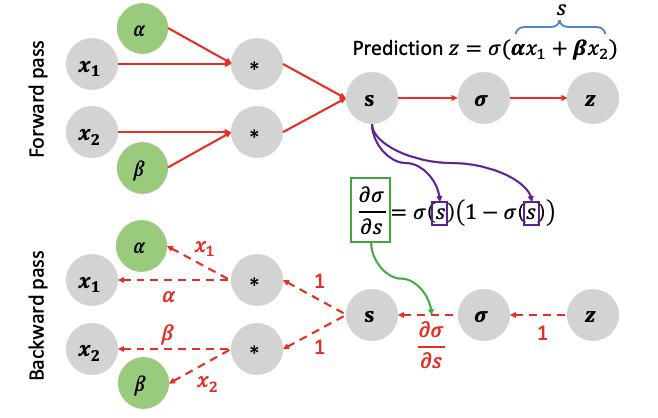

Например, у нас есть производная сигмы по ее аргументу. Производная сигмоидной функции - это сигма, умноженная на 1-сигма. Но эту производную нужно взять в какой-то точке, и эта точка - это ее аргумент s, который мы возьмем из прямого графа в TF.

### Инициализация весов

**Веса в нейронных сетях** — это числовые параметры, которые определяют, как сильно один нейрон влияет на другой. Они играют ключевую роль в процессе обучения нейронной сети, так как именно через обновление весов сеть настраивается для выполнения задач, будь то классификация изображений, распознавание речи, прогнозирование временных рядов или другие задачи.

**Как работают веса?**
Каждый нейрон в сети получает на вход множество сигналов от других нейронов (или внешних данных), и каждый из этих сигналов умножается на вес, связанный с соответствующим соединением. Веса можно представить как коэффициенты, определяющие, насколько важен вклад каждого входа в итоговое значение нейрона.

Когда нейрон получает свои взвешенные входы, он их суммирует, добавляет смещение (bias) и пропускает через функцию активации, которая вводит нелинейность в процесс. Этот процесс повторяется для всех нейронов сети, и на выходе сеть выдает результат.

**Зачем нужны веса?**
- Настройка модели - веса определяют, как входные данные преобразуются в выходные результаты. При правильной настройке весов сеть может выявить сложные зависимости и шаблоны в данных.

- В процессе обучения модели веса изменяются, чтобы сеть лучше выполняла свою задачу. Это происходит посредством алгоритма обратного распространения ошибки (backpropagation) и метода градиентного спуска. Алгоритм градиентного спуска корректирует веса таким образом, чтобы минимизировать разницу между предсказанными и реальными значениями

Инициализация весов — это важный шаг при создании нейронной сети. От правильной инициализации зависит эффективность и скорость обучения модели. Плохая инициализация может привести к таким проблемам, как медленное обучение, застревание в локальных минимумах, или, наоборот, слишком быстрое схлопывание активаций (например, во время обратного распространения ошибки).



Мы не можем инициализировать нулями.

Рассмотрим пример: у нас есть простейшая нейросеть с 4 входами, двумя скрытыми нейронами сигма2 и сигма3, и одним выходным нейроном - сигма1.

Посмотрим, что будет с весами w2 и w3 и как будет вычисляться производная в функции потерь по этим весам.

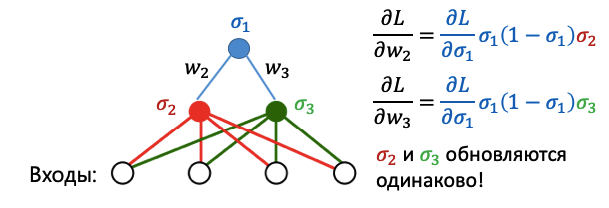

Если на данном примере мы стартуем на нулевых весах, то w2 и w3 будут обновляться симметрично, а значит, мы не научим никакую сложную комбинацию за счёт простоты сети. Это называют **симметрией**.

Чтобы сломать симметрию, мы можем использовать случайный шум.

### Epochs

**Произошла одна эпоха (epoch)** — весь датасет прошел через нейронную сеть в прямом и обратном направлении только один раз.

Так как одна эпоха слишком велика для используемой вычислительной мощности, датасет делят на маленькие партии — батчи.

> Почему мы используем более одной эпохи?
Вначале не понятно, почему недостаточно одного полного прохода датасета через нейронную сеть, и почему необходимо пускать полный датасет по сети несколько раз.

Нужно помнить, что мы используем ограниченный датасет, чтобы оптимизировать обучение и подстроить кривую под данные. Делается это с помощью градиентного спуска — итеративного процесса. Поэтому обновления весов после одного прохождения недостаточно.

Одна эпоха приводит к недообучению, а избыток эпох — к переобучению:

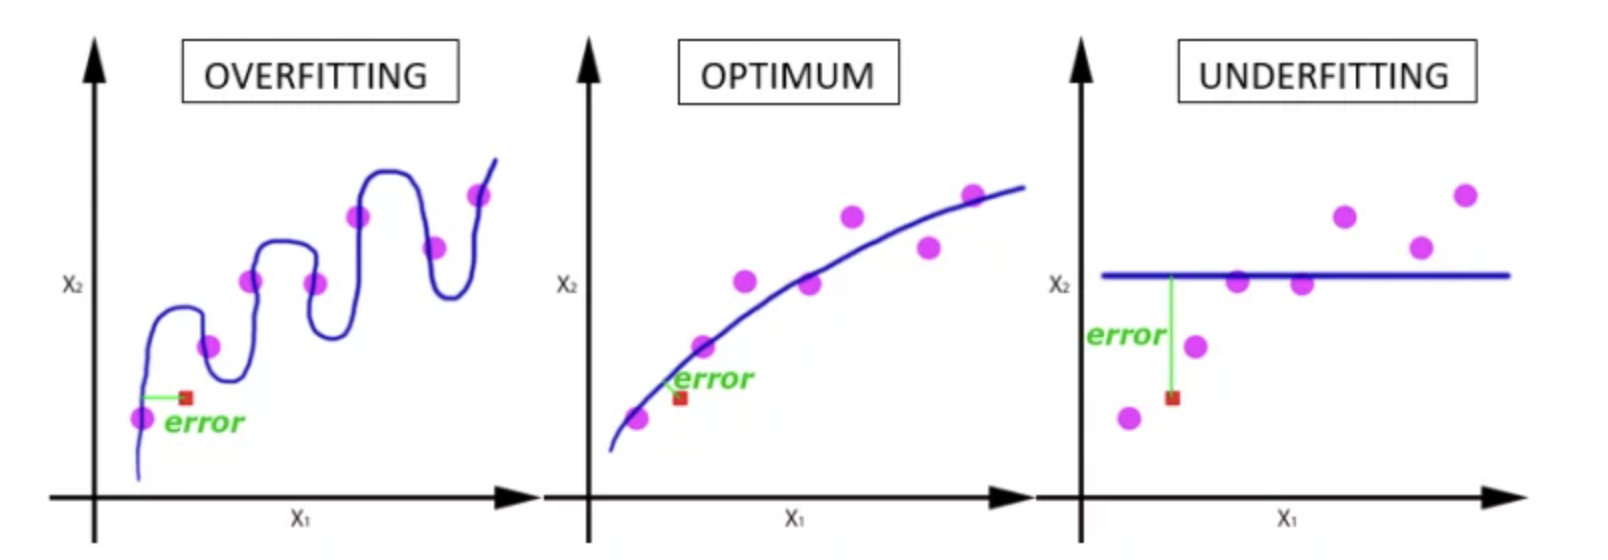

С увеличением числа эпох, веса нейронной сети изменяются все большее количество раз. Кривая с каждый разом лучше подстраивается под данные, переходя последовательно из плохо обученного состояния (последний график) в оптимальное (центральный график). Если вовремя не остановиться, то может произойти переобучение (первый график) — когда кривая очень точно подстроилась под точки, а обобщающая способность исчезла.

> Какое количество эпох правильное?
На этот вопрос нет единственного точного ответа. Для различных датасетов оптимальное количество эпох будет отличаться. Но ясно, что количество эпох связано с разнообразием в данных. Например, в вашем датасете присутствуют только черные котики? Или это более разнообразный датасет?

### Batch Size в нейронных сетях
**Размер батча** — это общее число тренировочных объектов, представленных в одном батче.

> Размер батча и число батчей — два разных параметра.

**Что такое батч?**
Нельзя пропустить через нейронную сеть разом весь датасет. Поэтому делим данные на пакеты, сеты или партии, так же, как большая статья делится на много разделов — введение, градиентный спуск, эпохи, Batch size и итерации. Такое разбиение позволяет легче прочитать и понять, например, статью.

**Итерации** — число батчей, необходимых для завершения одной эпохи.

> число батчей равно числу итераций для одной эпохи.

Например, собираемся использовать 2000 тренировочных объектов.

Можно разделить полный датасет из 2000 объектов на батчи размером 500 объектов. Таким образом, для завершения одной эпохи потребуется 4 итерации.

Получились следующие параметры:


```
Batch size = 500
Iterations = 4
Epoch = 1
```



##### Вопросы:
1. Что такое веса?
2. Для чего нужны эпохи?
3. Что такое батч?